In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning/Project/') # Võib-olla tuleb seda pathi kohendada

Mounted at /content/drive


In [2]:
import pandas as pd
filenames = [filename for filename in os.listdir() if ".csv" in filename]
filenames

['Plant_1_Weather_Sensor_Data.csv',
 'Plant_2_Weather_Sensor_Data.csv',
 'Plant_2_Generation_Data.csv',
 'Plant_1_Generation_Data.csv']

In [3]:
weather1 = pd.read_csv(filenames[0])
weather2 = pd.read_csv(filenames[1])
power1 = pd.read_csv(filenames[3])
power1['DC_POWER'] = power1['DC_POWER'] / 10
power2 = pd.read_csv(filenames[2])

In [4]:
power1.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,314.742621,307.802752,3295.968737,6.978712e+06
std,0.0,403.645717,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,42.900000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,636.696429,623.618750,6274.000000,7.268706e+06
max,4135001.0,1447.112500,1410.950000,9163.000000,7.846821e+06


In [5]:
power2.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [6]:
weather1

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [7]:
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])
weather2['DATE_TIME'] = pd.to_datetime(weather2['DATE_TIME'])
power1['DATE_TIME'] = pd.to_datetime(power1['DATE_TIME'])
power2['DATE_TIME'] = pd.to_datetime(power2['DATE_TIME'])
dataset1 = pd.merge(weather1, power1, on=['DATE_TIME', 'PLANT_ID'])
dataset2 = pd.merge(weather2, power2, on=['DATE_TIME', 'PLANT_ID'])
dataset = pd.concat([dataset1, dataset2], axis=0).reset_index(drop=True)
dataset.head()

<ipython-input-7-043e6e512e52>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  power1['DATE_TIME'] = pd.to_datetime(power1['DATE_TIME'])


,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


### Adding time feature to LR model
Yielded in lower accuracy

In [8]:
# minutes from midnight from datetime
dataset['MINUTES_FROM_MIDNIGHT'] = dataset['DATE_TIME'].dt.hour * 60 + dataset['DATE_TIME'].dt.minute
dataset['MINUTES_FROM_MIDNIGHT']

,MINUTES_FROM_MIDNIGHT
0,0
1,0
2,0
3,0
4,0
...,...
136467,1425
136468,1425
136469,1425
136470,1425


### Encoding inverter labels for use in LR model
Yielded in lower prediction accuracy

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'dataset' and the feature is 'SOURCE_KEY_y'
# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the feature values and transform them
dataset['SOURCE_KEY_ENCODED'] = encoder.fit_transform(dataset['SOURCE_KEY_y'])

### Feature selection and model training

In [10]:
import numpy as np
X = np.array(dataset[['IRRADIATION',
                      'AMBIENT_TEMPERATURE',
                      "MODULE_TEMPERATURE",
                      ]])
y = np.array(dataset['DC_POWER'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

# Reshape X to a 2D array for sklearn
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = np.mean(np.abs(y_pred - y_test))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 81.32429382802908
R-squared: 0.7894748687531807


In [12]:
print("Prediction baseline:", round(mae, 2), "for target average", round(y_test.mean(), 2))

Prediction baseline: 81.32 for target average 280.57


## Removing rows with faults from the dataset to improve prediction results.
Sometimes the DC_POWER will be zero even though IRRADIATION shows plenty of sunshine - this means that there is something wrong with the inverter, the grid or the sensors. This kind of data should not be used for predictions. It can be used, though, to point at faulty equipment that needs fixing.

Removing all data points (readings for 15 minute intervals) where DC_POWER was 0 while IRRADIATION wasn't, brought the MAE down from ~80 to ~30 for a mean DC_POWER of ~280.

In [13]:
mask = (dataset['DC_POWER'] == 0) & (dataset['IRRADIATION'] > 0)
dataset_nofaults = dataset.loc[~mask]

In [14]:
dataset_nofaults.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,MINUTES_FROM_MIDNIGHT,SOURCE_KEY_ENCODED
0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,0
1,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0,1
2,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0,2
3,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0,4
4,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0,11


In [15]:
import numpy as np
X = np.array(dataset_nofaults[['IRRADIATION',
                      'AMBIENT_TEMPERATURE',
                      "MODULE_TEMPERATURE",
                      ]])
y = np.array(dataset_nofaults['DC_POWER'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

# Reshape X to a 2D array for sklearn
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = np.mean(np.abs(y_pred - y_test))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 30.974081569067028
R-squared: 0.9661512798767067


## Now we would like to remove faults with a little more finess
This would mean calculating a threshold ratio between DC_POWER and IRRADIATION.

To this end, we will calculate a linear regression model on what looks like the worst inverter's DC_POWER and IRRADIATION relationship and nudge it a bit to find a line that captures

[571.99335683] -0.1


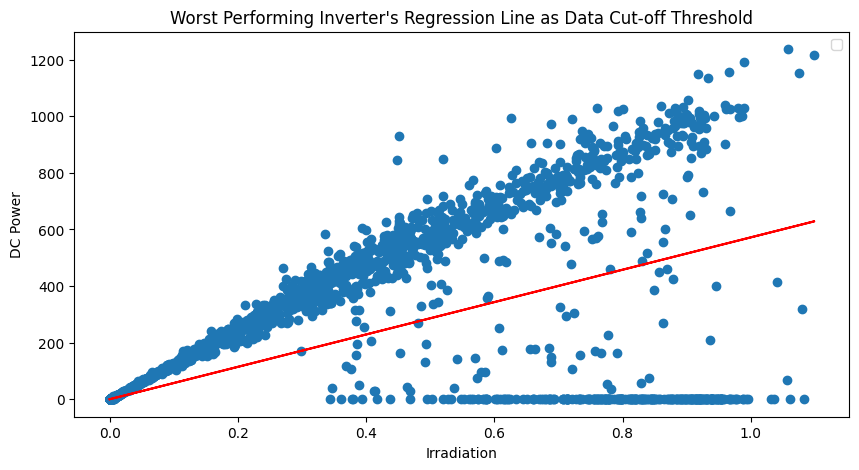

In [18]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# subset of dataset where 'SOURCE_KEY' is 'Quc1TzYxW2pYoWX'
sub_dataset = dataset.loc[dataset['SOURCE_KEY_y'] == 'Quc1TzYxW2pYoWX']
lr = LinearRegression()
lr.fit(sub_dataset[['IRRADIATION']], sub_dataset['DC_POWER'])
lr.intercept_ = -0.1
y_pred = lr.predict(sub_dataset[['IRRADIATION']])
print(lr.coef_, lr.intercept_)
plt.figure(figsize=(10, 5))
plt.scatter(sub_dataset['IRRADIATION'], sub_dataset['DC_POWER'])
plt.plot(sub_dataset['IRRADIATION'], y_pred, color='red')
# annotate plot
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.title("Worst Performing Inverter's Regression Line as Data Cut-off Threshold")
plt.legend()  # Show legend for the regression line

# It would seem that the DC power drops after about 0.3 Irradiation. With lover irradiation, the DC power is fine.

In [ ]:
cutoff_ratio = lr.coef_[0]
cutoff_ratio
dataset_ratioFiltered = dataset.loc[((dataset['DC_POWER'] == 0) & (dataset['IRRADIATION'] == 0)) |
                                    (dataset['DC_POWER'] / dataset['IRRADIATION'] > cutoff_ratio)]

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,MINUTES_FROM_MIDNIGHT,SOURCE_KEY_ENCODED
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,0,0
1,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,0,1
2,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,0,2
3,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,0,4
4,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136467,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,1425,32
136468,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,1425,34
136469,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,1425,37
136470,2020-06-17 23:45:00,4136001,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,1425,39


In [ ]:
import numpy as np
X = np.array(dataset_ratioFiltered[['IRRADIATION',
                      'AMBIENT_TEMPERATURE',
                      "MODULE_TEMPERATURE",
                      ]])
y = np.array(dataset_ratioFiltered['DC_POWER'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

# Reshape X to a 2D array for sklearn
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = np.mean(np.abs(y_pred - y_test))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 26.194214893274857
R-squared: 0.9828050186109746


In [ ]:
original_size = dataset.shape[0]
print(dataset.shape[0] / original_size)
print(dataset_nofaults.shape[0] / original_size)
print(dataset_ratioFiltered.shape[0] / original_size)

1.0
0.9395260566270004
0.931670965472771


## Weather time shift for predictions
An experiment to shift the weather values by 15 minutes and essentially predict future DC_POWER yielded in 30% lost accuracy for the Linear Regression model

In [ ]:
weather = pd.concat([weather1, weather2], axis=0).reset_index(drop=True)
power = pd.concat([power1, power2], axis=0).reset_index(drop=True)
# add 15 minutes to weather DATE_TIME
print(weather.head())
weather['DATE_TIME'] = weather['DATE_TIME'] + pd.Timedelta(minutes=15)
print(weather.head())

            DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  
            DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1 2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2 2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3 2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkN